In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('D:\\AAIC\\Project 5\\Price-Optimization-Project\\notebook\\data\\train.tsv',sep='\t')
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:

def find_missing_values(data):
    
    df = pd.DataFrame(data.isnull().sum())
    df['percent_missing'] = round((df/data.shape[0])*100,3)
    df.rename(columns={0:'missing_count'},inplace=True)
    df = df[df['missing_count'] != 0].sort_values('missing_count',ascending=False)

    return df

df = find_missing_values(data)
print(df)

                  missing_count  percent_missing
brand_name               632682           42.676
category_name              6327            0.427
item_description              6            0.000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


Exploratory Data Analysis

In [6]:
print("Total number of records: ", data.shape[0])
print("Total number of features: ", data.shape[1])

Total number of records:  1482535
Total number of features:  8


In [7]:
print(data.price.describe())
print('\n Maximum Value in price column: ', data['price'].max())
print('Number of records having max price: ', data[data['price'] == data['price'].max()].shape[0])
print('Number of records having min price: ', data[data['price'] == data['price'].min()].shape[0])
z = data[data['price'] == data['price'].max()]
print('Record(s) having max price: ')
z.head(5)

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

 Maximum Value in price column:  2009.0
Number of records having max price:  1
Number of records having min price:  874
Record(s) having max price: 


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
760469,760469,NEW Chanel WOC Caviar Gold Hardware,1,Women/Women's Handbags/Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."


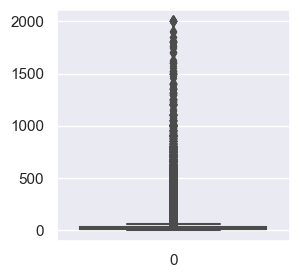

In [8]:
plt.figure(figsize=(3,3))
sns.set(style='darkgrid')
sns.boxplot(data['price'])
plt.show()

#### Checking the percentile values to detect the outlier in the Price Column :

In [9]:
for i in range(0,110,10):
    print('{0} percentile value : {1}'.format(i, np.percentile(data['price'],i)))

0 percentile value : 0.0
10 percentile value : 7.0
20 percentile value : 10.0
30 percentile value : 12.0
40 percentile value : 14.0
50 percentile value : 17.0
60 percentile value : 20.0
70 percentile value : 26.0
80 percentile value : 34.0
90 percentile value : 51.0
100 percentile value : 2009.0


In [10]:
for i in range(90,101,):
    print('{0} percentile value : {1}'.format(i, np.percentile(data['price'],i)))

90 percentile value : 51.0
91 percentile value : 55.0
92 percentile value : 58.0
93 percentile value : 62.0
94 percentile value : 67.0
95 percentile value : 75.0
96 percentile value : 85.0
97 percentile value : 99.0
98 percentile value : 122.0
99 percentile value : 170.0
100 percentile value : 2009.0


In [11]:
print('Number of records having price above 97 percentile value: ', data[data['price'] > 99.0].shape[0])

Number of records having price above 97 percentile value:  44313


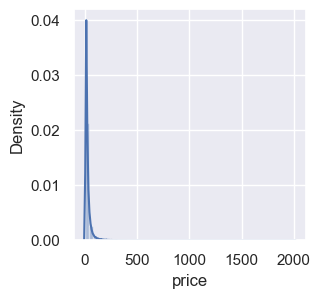

In [12]:
plt.figure(figsize=(3,3))
sns.distplot(data['price'])
plt.show()

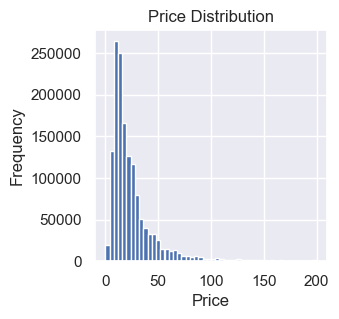

In [13]:
data['price'].plot.hist(bins=50,range=[0,200], figsize=(3,3))
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

Majority of the products (97 %ile) has price less than $ 100.

Approximately 44K products are having price above $99.

Price is heavily skewed to the right.

##### EDA On Shipping Field:

In [14]:
data['shipping'].value_counts(normalize=True)*100

shipping
0    55.272557
1    44.727443
Name: proportion, dtype: float64

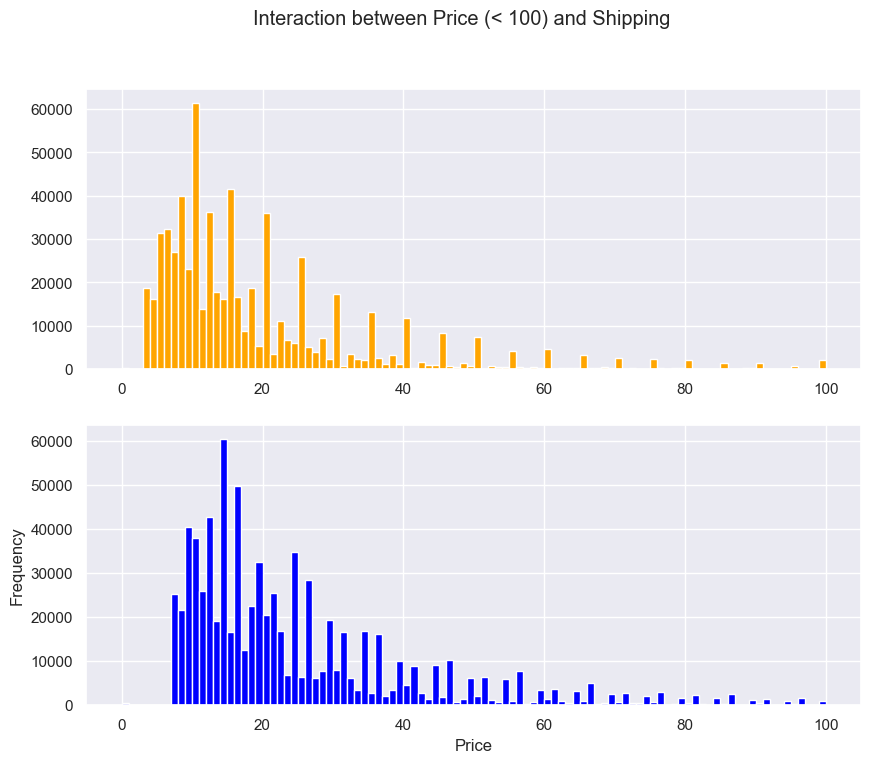

In [33]:
shipper_seller_price = data[data['shipping'] == 1]['price']
shipper_buyer_price = data[data['shipping'] == 0]['price']


fig, ax = plt.subplots(2,figsize=(10,8))
fig.suptitle('Interaction between Price (< 100) and Shipping')
ax[0].hist(shipper_seller_price, color='orange', bins=100, alpha=1.0, range=[0,100], label='Price when shipping done by shipper')
ax[1].hist(shipper_buyer_price, color='blue', alpha=1.0,bins=100,  range=[0,100], label='Price when shipping done by buyer')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

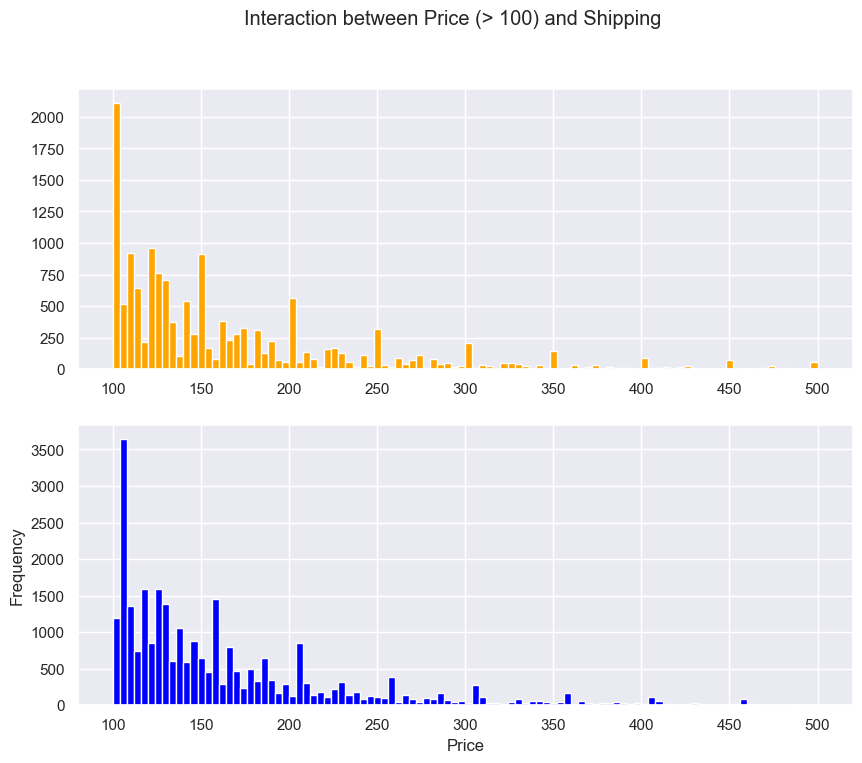

In [32]:
fig, ax = plt.subplots(2,figsize=(10,8))
fig.suptitle('Interaction between Price (> 100) and Shipping')
ax[0].hist(shipper_seller_price, color='orange', bins=100, alpha=1.0, range=[100,500], label='Price when shipping done by shipper')
ax[1].hist(shipper_buyer_price, color='blue', alpha=1.0,bins=100,  range=[100,500], label='Price when shipping done by buyer')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

In [34]:
print('Median price when shipping paid by seller : ',shipper_seller_price.median() )
print('Max price when shipping paid by seller : ',shipper_seller_price.max() )
print('Median price when shipping paid by buyer : ',shipper_buyer_price.median() )
print('Max price when shipping paid by buyer : ',shipper_buyer_price.max() )

Median price when shipping paid by seller :  14.0
Max price when shipping paid by seller :  2000.0
Median price when shipping paid by buyer :  20.0
Max price when shipping paid by buyer :  2009.0
